In [63]:
# pacotes comuns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
#Pacotes de machine learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


def generate_templates(n=100):
    data = []
    ids = random.sample(range(1000, 9999), n)  # Gerando IDs únicos aleatórios
    
    for i in range(n):
        id_template = ids[i]
        width = random.randint(300, 4000)
        height = random.randint(300, 4000)
        area = width * height
        preco = area * 0.002
        data.append([id_template, width, height, area, round(preco, 2)])
    
    df = pd.DataFrame(data, columns=["ID", "Width", "Height", "Area", "Preco"])
    return df

# DataFrame gerado
template_df = generate_templates()

# Exemplo de exibição
print(template_df.head(10))



     ID  Width  Height      Area     Preco
0  3878   3682    2973  10946586  21893.17
1  8295   1088    1039   1130432   2260.86
2  8788   3321    3131  10398051  20796.10
3  6713   2706     842   2278452   4556.90
4  4376   2180    2234   4870120   9740.24
5  5535   2412    1204   2904048   5808.10
6  5166   1374    2985   4101390   8202.78
7  9442    927    3455   3202785   6405.57
8  7351    453    2413   1093089   2186.18
9  5740   1764    1361   2400804   4801.61


In [40]:
#Ignorar avisos
import warnings
warnings.filterwarnings("ignore");

In [64]:
#X variavei explicativas
x = pd.DataFrame(template_df.values, columns=template_df.columns);
#Y Variavel de explicação
y = template_df["Preco"];

In [65]:
dados = x.copy();
dados["Preco"] = y;

In [ ]:
print(dados);

In [66]:
def eqm(y_verdadeir, y_Previsto) : 
    """
    Input: Dois vetores com a mesma dimenção
    Output: Escalar com o erro quadrático médio
    """
    return np.mean(np.square(y_verdadeir-y_Previsto));

In [67]:
X_treino, X_dev, Y_treino, Y_dev = train_test_split(x, y, test_size=0.3, random_state=42);
X_val, X_teste, Y_val, Y_teste = train_test_split(X_dev, Y_dev, test_size=0.5, random_state=42);

In [45]:
variaveis = X_treino.columns

In [46]:
##Pelo que entendo o modelo1 será treinado depois disso eu vou criar na variavel X_Treino uma nova coluna onde o modelo um irá usar os dados do X_treino para previr informações baseadas no X_treino[variaveis]
modelo1 = RandomForestRegressor(max_depth=2,random_state=12);
modelo1.fit(X_treino[variaveis], Y_treino);
X_treino["preco_previsto_1"] = modelo1.predict(X_treino[variaveis]);
X_val["preco_previsto_1"] = modelo1.predict(X_val[variaveis]);

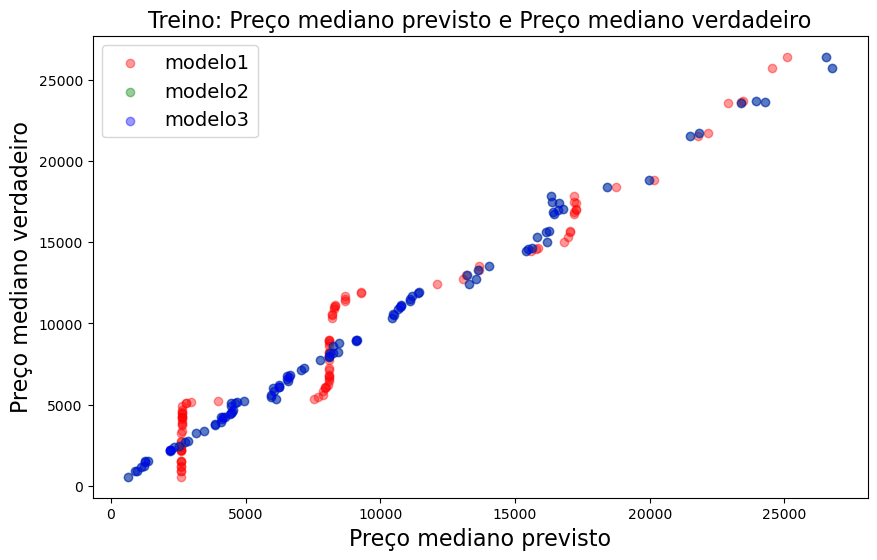

      ID  Width  Height     Area     Preco  NovoPrecoPrevisto1  \
0   5565    555    3355  1862025   3724.05         2626.335445   
1   3762   3361    2152  7232872  14465.74        15596.064400   
2   3786   1881    2179  4098699   8197.40         8110.901160   
3   1562    553    3850  2129050   4258.10         2626.335445   
4   2401   2772    3070  8510040  17020.08        17259.532671   
..   ...    ...     ...      ...       ...                 ...   
95  2202   3374    2319  7824306  15648.61        17052.164378   
96  2594   1981    2878  5701318  11402.64         8672.868762   
97  5801   2455     489  1200495   2400.99         2595.143513   
98  8846   1507     824  1241768   2483.54         2595.143513   
99  6773   1545     487   752415   1504.83         2595.143513   

    NovoPrecoPrevisto2  NovoPrecoPrevisto3  
0            3875.4435           3875.4435  
1           15419.0354          15419.0354  
2            8245.5605           8245.5605  
3            4078.2349     

In [75]:
novaBase = generate_templates();

modeloNovo1 = RandomForestRegressor(max_depth=2,random_state=12);
modeloNovo1.fit(X_treino[variaveis], Y_treino);#faço o treino com variavei ja existentes
novaBase["NovoPrecoPrevisto1"] = modeloNovo1.predict(novaBase[variaveis]);#faço a previsão com o modelo treinado usando os dados Novos

modeloNovo2 = RandomForestRegressor(max_depth=10,random_state=12);
modeloNovo2.fit(X_treino[variaveis], Y_treino);#faço o treino com variavei ja existentes
novaBase["NovoPrecoPrevisto2"] = modeloNovo2.predict(novaBase[variaveis]);#faço a previsão com o modelo treinado usando os dados Novos

modeloNovo3 = RandomForestRegressor(max_depth=None,random_state=12);
modeloNovo3.fit(X_treino[variaveis], Y_treino);#faço o treino com variavei ja existentes
novaBase["NovoPrecoPrevisto3"] = modeloNovo3.predict(novaBase[variaveis]);#faço a previsão com o modelo treinado usando os dados Novos

plt.figure(figsize = (10,6));
plt.scatter(novaBase['NovoPrecoPrevisto1'], novaBase['Preco'], c="r", alpha=0.4, label="modelo1");
plt.scatter(novaBase['NovoPrecoPrevisto2'], novaBase['Preco'], c="g", alpha=0.4, label="modelo2");
plt.scatter(novaBase['NovoPrecoPrevisto3'], novaBase['Preco'], c="b", alpha=0.4, label="modelo3");
plt.title('Treino: Preço mediano previsto e Preço mediano verdadeiro', fontsize = 16);
plt.xlabel("Preço mediano previsto", fontsize = 16);
plt.ylabel("Preço mediano verdadeiro", fontsize = 16);
plt.legend(fontsize=14);
plt.show();


In [47]:
modelo2 = RandomForestRegressor(max_depth=10,random_state=12);
modelo2.fit(X_treino[variaveis], Y_treino);
X_treino["preco_previsto_2"] = modelo2.predict(X_treino[variaveis]);
X_val["preco_previsto_2"] = modelo2.predict(X_val[variaveis]);

In [48]:
modelo3 = RandomForestRegressor(max_depth=None,random_state=12);
modelo3.fit(X_treino[variaveis], Y_treino);
X_treino["preco_previsto_3"] = modelo3.predict(X_treino[variaveis]);
X_val["preco_previsto_3"] = modelo3.predict(X_val[variaveis]);

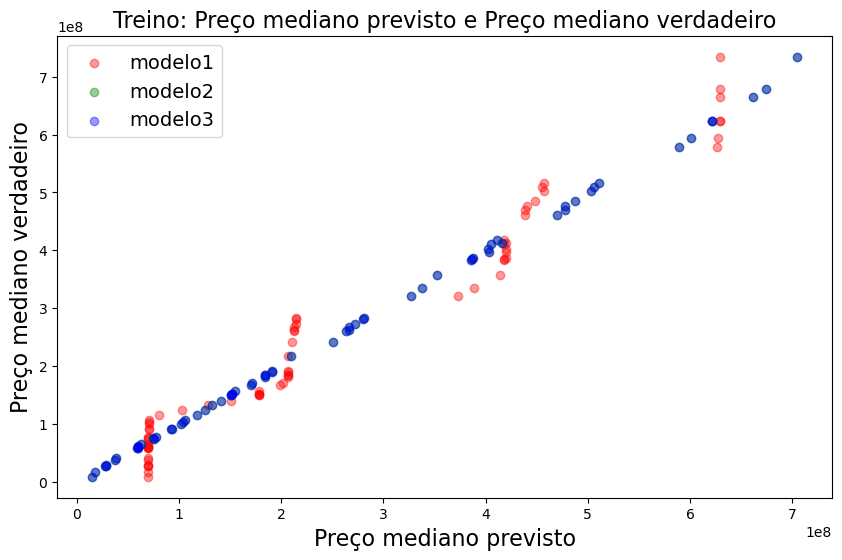

EQM da validação no modelo 1 foi de:  1397618804324184.8
EQM da validação no modelo 2 foi de:  39812235534755.086
EQM da validação no modelo 3 foi de:  39812235534755.086


In [49]:
plt.figure(figsize = (10,6));
plt.scatter(X_treino['preco_previsto_1'], Y_treino, c="r", alpha=0.4, label="modelo1");
plt.scatter(X_treino['preco_previsto_2'], Y_treino, c="g", alpha=0.4, label="modelo2");
plt.scatter(X_treino['preco_previsto_3'], Y_treino, c="b", alpha=0.4, label="modelo3");
plt.title('Treino: Preço mediano previsto e Preço mediano verdadeiro', fontsize = 16);
plt.xlabel("Preço mediano previsto", fontsize = 16);
plt.ylabel("Preço mediano verdadeiro", fontsize = 16);
plt.legend(fontsize=14);
plt.show();

novo_EQM_val1 = eqm(X_val['preco_previsto_1'], Y_val);
novo_EQM_val2 = eqm(X_val['preco_previsto_2'], Y_val);
novo_EQM_val3 = eqm(X_val['preco_previsto_3'], Y_val);

print("EQM da validação no modelo 1 foi de: ", novo_EQM_val1);
print("EQM da validação no modelo 2 foi de: ", novo_EQM_val2);
print("EQM da validação no modelo 3 foi de: ", novo_EQM_val3);

In [ ]:
plt.figure(figsize = (10,6));
plt.scatter(X_treino['preco_previsto_1'], Y_treino, c="r", alpha=0.4);
plt.title('Treino: Preço mediano previsto e Preço mediano verdadeiro', fontsize = 16);
plt.xlabel("Preço mediano previsto", fontsize = 16);
plt.ylabel("Preço mediano verdadeiro", fontsize = 16);
plt.legend(fontsize=14);
plt.show();

novo_EQM_val1 = eqm(X_val['preco_previsto_1'], Y_val);
novo_EQM_val2 = eqm(X_val['preco_previsto_2'], Y_val);
novo_EQM_val3 = eqm(X_val['preco_previsto_3'], Y_val);

print("EQM da validação no modelo 1 foi de: ", novo_EQM_val1);
print("EQM da validação no modelo 2 foi de: ", novo_EQM_val2);
print("EQM da validação no modelo 3 foi de: ", novo_EQM_val3);

In [50]:
X_teste["preco_previsto"] = modelo2.predict(X_teste[variaveis]);

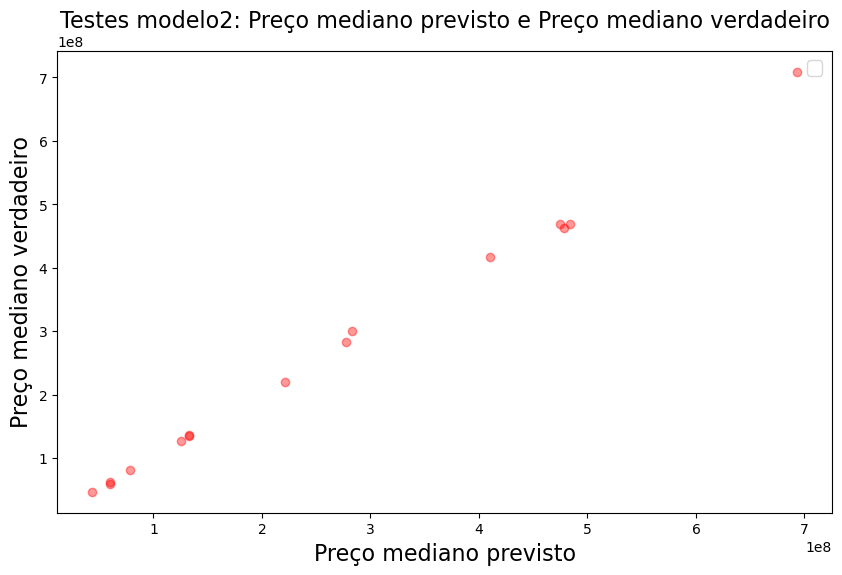

EQM do conjunto testes foi de:  79419939148359.86


In [57]:
plt.figure(figsize = (10,6));
plt.scatter(X_teste["preco_previsto"], Y_teste, c="r", alpha=0.4);
plt.title('Testes modelo2: Preço mediano previsto e Preço mediano verdadeiro', fontsize = 16);
plt.xlabel("Preço mediano previsto", fontsize = 16);
plt.ylabel("Preço mediano verdadeiro", fontsize = 16);
plt.legend(fontsize=14);
plt.show();
novo_EQM_Testes = eqm(X_teste["preco_previsto"], Y_teste);
print("EQM do conjunto testes foi de: ", novo_EQM_Testes);